# Calgary Crime Statistics

The aim of this project to predict the crime hotspot in Calgary, based on the data present in the dataset. The dataset is from Kaggle. The project aims to predicts the hot sector, by analysing the features such as crime count, resident count, category and many more. The dataset has 66,350 rows and 10 columns. 
Link for Dataset : https://www.kaggle.com/datasets/tcashion/calgary-crime-statistics

## Data dictionary

| **Column Name**          | **Description**                                                                                         | **Example Value**                                   | **Data Type**   |
|---------------------------|---------------------------------------------------------------------------------------------------------|----------------------------------------------------|-----------------|
| **Sector**                | The geographic region of Calgary where the crime occurred. Could represent police divisions or zones.   | NORTHWEST                                          | Categorical     |
| **Community Name**        | The name of the community within Calgary where the crime occurred.                                      | 01B                                                | Categorical     |
| **Category**              | The type or category of crime (e.g., assault, theft, break & enter).                                    | Break & Enter - Commercial                         | Categorical     |
| **Crime Count**           | The number of crimes recorded for the specific row.                                                    | 1                                                  | Numerical       |
| **Resident Count**        | The population count of the community (if available).                                                  | 0.0                                                | Numerical       |
| **Date**                  | The date when the crime was recorded. Format: YYYY/MM.                                                 | 2022/11                                            | Date/Time       |
| **Year**                  | The year when the crime was recorded.                                                                  | 2022                                               | Numerical       |
| **Month**                 | The month (abbreviated) when the crime was recorded.                                                   | NOV                                                | Categorical     |
| **ID**                    | A unique identifier for each crime record, combining year, month, community, and category.             | 2022-NOV-01B-Assault (Non-domestic)               | Categorical     |
| **Community Center Point**| The geographic coordinates of the community center as a string (latitude and longitude).               | POINT (-114.24261426059833 51.102826007628536)     | Categorical     |


### Crime category:

| **Crime Category**                | **Description**                                                                 | **Frequency** |
|-----------------------------------|---------------------------------------------------------------------------------|---------------|
| **Theft FROM Vehicle**            | Theft of items from inside a vehicle.                                           | 14,411        |
| **Theft OF Vehicle**              | Theft of an entire vehicle.                                                     | 11,037        |
| **Break & Enter - Commercial**    | Break-ins targeting commercial properties such as stores or offices.            | 9,189         |
| **Assault (Non-domestic)**        | Physical attacks not related to domestic violence.                              | 8,409         |
| **Violence Other (Non-domestic)** | Other forms of non-domestic violent crimes.                                     | 7,119         |
| **Break & Enter - Dwelling**      | Break-ins targeting residential properties or dwellings.                        | 6,402         |
| **Break & Enter - Other Premises**| Break-ins targeting premises other than dwellings or commercial properties.     | 5,743         |
| **Street Robbery**                | Robberies occurring in public spaces or on the street.                          | 2,410         |
| **Commercial Robbery**            | Robberies targeting commercial entities such as businesses or banks.            | 1,629         |



In [129]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [130]:
df = pd.read_csv('Calgary_Crime_Statistics_Dataset.csv')
df.head()

,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,ID,Community Center Point
0,NORTHWEST,01B,Assault (Non-domestic),1,0.0,2022/11,2022,NOV,2022-NOV-01B-Assault (Non-domestic),POINT (-114.24261426059833 51.102826007628536)
1,NORTHWEST,01B,Break & Enter - Commercial,1,0.0,2019/06,2019,JUN,2019-JUN-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)
2,NORTHWEST,01B,Break & Enter - Commercial,1,0.0,2019/08,2019,AUG,2019-AUG-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)
3,NORTHWEST,01B,Break & Enter - Commercial,2,0.0,2020/03,2020,MAR,2020-MAR-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)
4,NORTHWEST,01B,Break & Enter - Commercial,2,0.0,2020/07,2020,JUL,2020-JUL-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)


### Data Preprocessing 1

In [131]:
# Checking the shape of the dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66349 entries, 0 to 66348
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  66319 non-null  object 
 1   Community Name          66349 non-null  object 
 2   Category                66349 non-null  object 
 3   Crime Count             66349 non-null  int64  
 4   Resident Count          66282 non-null  float64
 5   Date                    66349 non-null  object 
 6   Year                    66349 non-null  int64  
 7   Month                   66349 non-null  object 
 8   ID                      66349 non-null  object 
 9   Community Center Point  66319 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.1+ MB


In [132]:
#Set ID as index
df.set_index('ID',inplace = True)
df.head()

,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,Community Center Point
ID,,,,,,,,,
2022-NOV-01B-Assault (Non-domestic),NORTHWEST,01B,Assault (Non-domestic),1,0.0,2022/11,2022,NOV,POINT (-114.24261426059833 51.102826007628536)
2019-JUN-01B-Break & Enter - Commercial,NORTHWEST,01B,Break & Enter - Commercial,1,0.0,2019/06,2019,JUN,POINT (-114.24261426059833 51.102826007628536)
2019-AUG-01B-Break & Enter - Commercial,NORTHWEST,01B,Break & Enter - Commercial,1,0.0,2019/08,2019,AUG,POINT (-114.24261426059833 51.102826007628536)
2020-MAR-01B-Break & Enter - Commercial,NORTHWEST,01B,Break & Enter - Commercial,2,0.0,2020/03,2020,MAR,POINT (-114.24261426059833 51.102826007628536)
2020-JUL-01B-Break & Enter - Commercial,NORTHWEST,01B,Break & Enter - Commercial,2,0.0,2020/07,2020,JUL,POINT (-114.24261426059833 51.102826007628536)


In [133]:
# Checking for null/missing values
df.isnull().sum()

Sector                    30
Community Name             0
Category                   0
Crime Count                0
Resident Count            67
Date                       0
Year                       0
Month                      0
Community Center Point    30
dtype: int64

The dataset has 3 columns with missing values - Sector, Resident Count and Community Center Point. For the missing values, as the data is quite less in number so we will delete the rows. We will refactor the sector column in 4 quadrants(Centre, NE, SE, SW, NW) as it is our target variable.

In [134]:
#Drop the unnecessary column
df.drop('Community Center Point', axis=1,inplace=True)
df.drop('Date', axis=1,inplace=True)
df.rename(columns={'Category':'Crime Category'}, inplace=True)

In [135]:
df['Sector'].value_counts()
print(df['Sector'].value_counts())

Sector
CENTRE       17526
NORTHEAST    11560
SOUTH        10044
NORTHWEST     6452
WEST          5488
NORTH         5475
EAST          5145
SOUTHEAST     4629
Name: count, dtype: int64


So for the "Sector" column we will refactor some data like we will replace 
1.NORTHEAST and EAST with NE
2.NORTHWEST and NORTH with NW
3.SOUTHEAST with SE
4.SOUTH and WEST with SW 

In [136]:
# Replace specific sector names
df['Sector'] = df['Sector'].replace({
    'NORTHEAST': 'NE',
    'EAST': 'NE',
    'NORTHWEST': 'NW',
    'NORTH': 'NW',
    'SOUTHEAST': 'SE',
    'SOUTH': 'SW',
    'WEST': 'SW',  # Or 'NW' based on your analysis
    'CENTRE': 'CENTRAL'  # Keep 'Central' or assign to a quadrant if suitable
})

In [137]:
df['Sector'].value_counts()

Sector
CENTRAL    17526
NE         16705
SW         15532
NW         11927
SE          4629
Name: count, dtype: int64

In [138]:
df.dtypes

Sector             object
Community Name     object
Crime Category     object
Crime Count         int64
Resident Count    float64
Year                int64
Month              object
dtype: object

In [139]:
df=df.dropna()

In [140]:
df.isnull().sum()

Sector            0
Community Name    0
Crime Category    0
Crime Count       0
Resident Count    0
Year              0
Month             0
dtype: int64

In [141]:
# Unique value count
df.nunique()

Sector              5
Community Name    287
Crime Category      9
Crime Count        79
Resident Count    207
Year                6
Month              12
dtype: int64

In [142]:
# Checking descriptive satistics of the data
df.describe()

,Crime Count,Resident Count,Year
count,66282.000000,66282.000000,66282.000000
mean,2.889970,6500.305105,2020.424776
std,3.694919,5456.100956,1.698621
min,1.000000,0.000000,2018.000000
25%,1.000000,2263.000000,2019.000000
50%,2.000000,5957.000000,2020.000000
75%,3.000000,9244.000000,2022.000000
max,110.000000,25710.000000,2023.000000


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the data and try to undersatnd the data. I will begin by looking at the distribution of data across the dataset, followed by visualizing the data to understand the relationship between the features and the target variable.

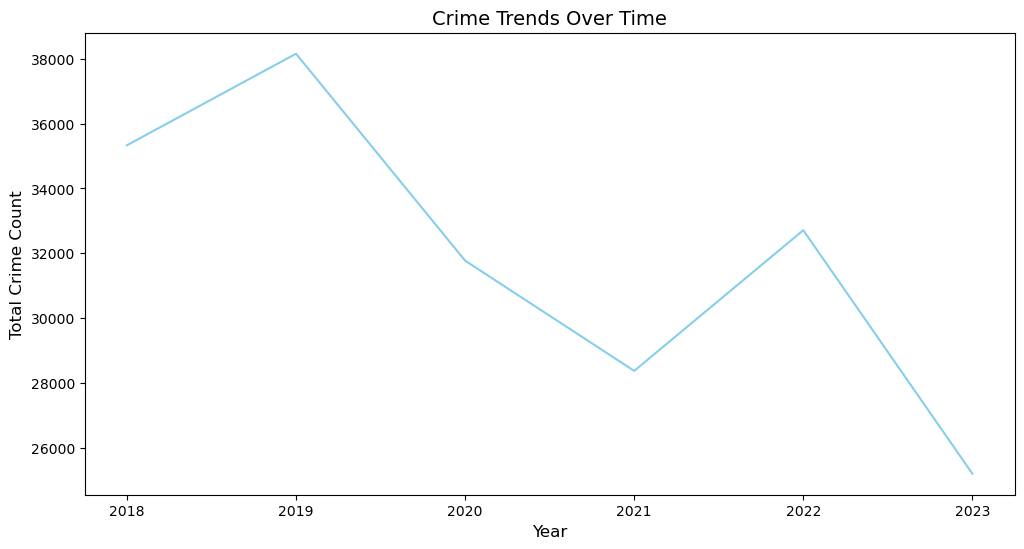

In [143]:
crime_trends=df.groupby('Year')['Crime Count'].sum()

# Plotting the crime trends over time
plt.figure(figsize=(12, 6))
plt.plot(crime_trends.index,crime_trends.values,color='skyblue',label='Crime Count')
plt.title('Crime Trends Over Time',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Total Crime Count',fontsize=12)
plt.show()

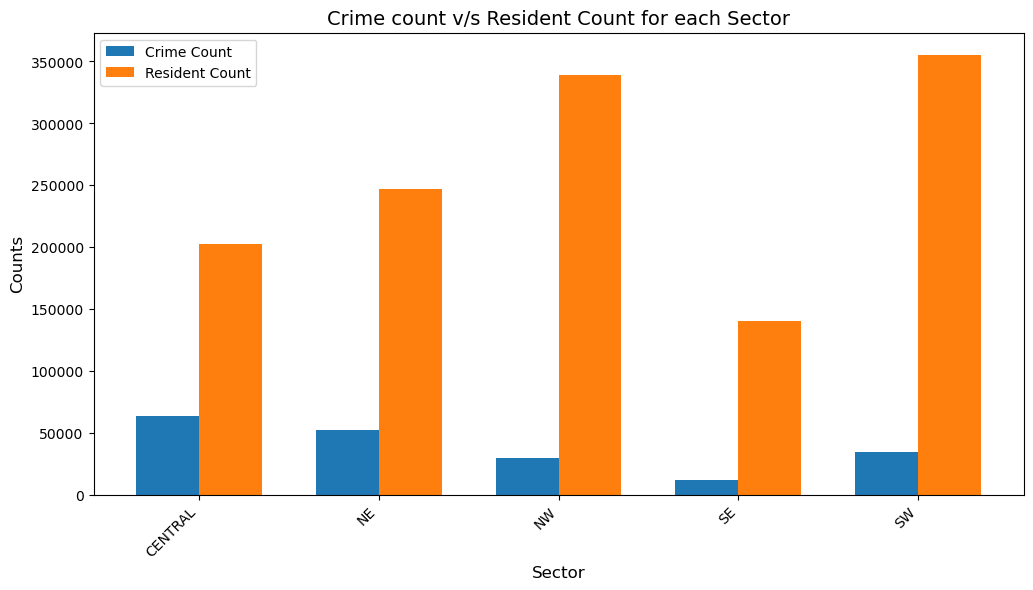

In [144]:
# Group data by 'Sector' and calculate the sum of 'Crime Count'
CrimeSum = df.groupby('Sector')[['Crime Count']].sum()
ResidentSum = df.groupby('Sector')['Resident Count'].unique().apply(np.sum)

# Plotting the double bar chart
fig,ax=plt.subplots(figsize=(12, 6))

# Create bars for CrimeCount and ResidentCount
ax.bar(x-bar_width/2,CrimeSum['Crime Count'],bar_width,label='Crime Count',color='tab:blue')
ax.bar(x+bar_width/2,ResidentSum,bar_width,label='Resident Count',color='tab:orange')

# Add labels, title, and ticks
ax.set_xlabel('Sector',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)
ax.set_title('Crime count v/s Resident Count for each Sector',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(CrimeSum.index, rotation=45,ha='right')
ax.legend()
plt.show()

C:\Users\kmsim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Crime Count')

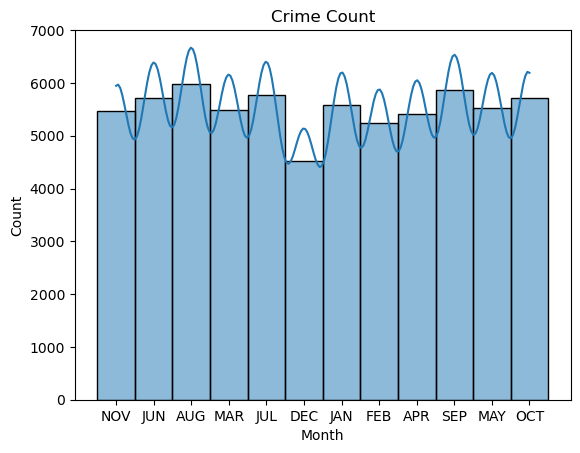

In [145]:
sns.histplot(x = df['Month'],kde = True, bins = 50).set_title('Crime Count')

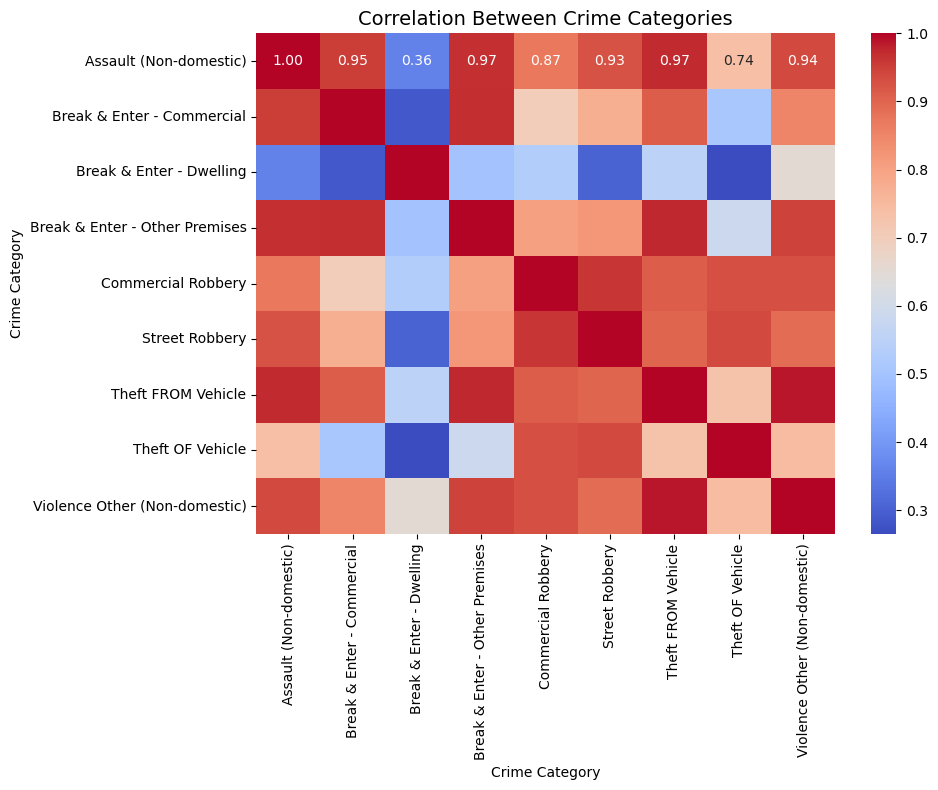

In [146]:
# Create a correlation matrix for crime categories by sector
crime_by_sector=df.pivot_table(index='Sector',columns='Crime Category',values='Crime Count',aggfunc='sum')
correlation_matrix=crime_by_sector.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Between Crime Categories', fontsize=14)
plt.tight_layout()
plt.show()


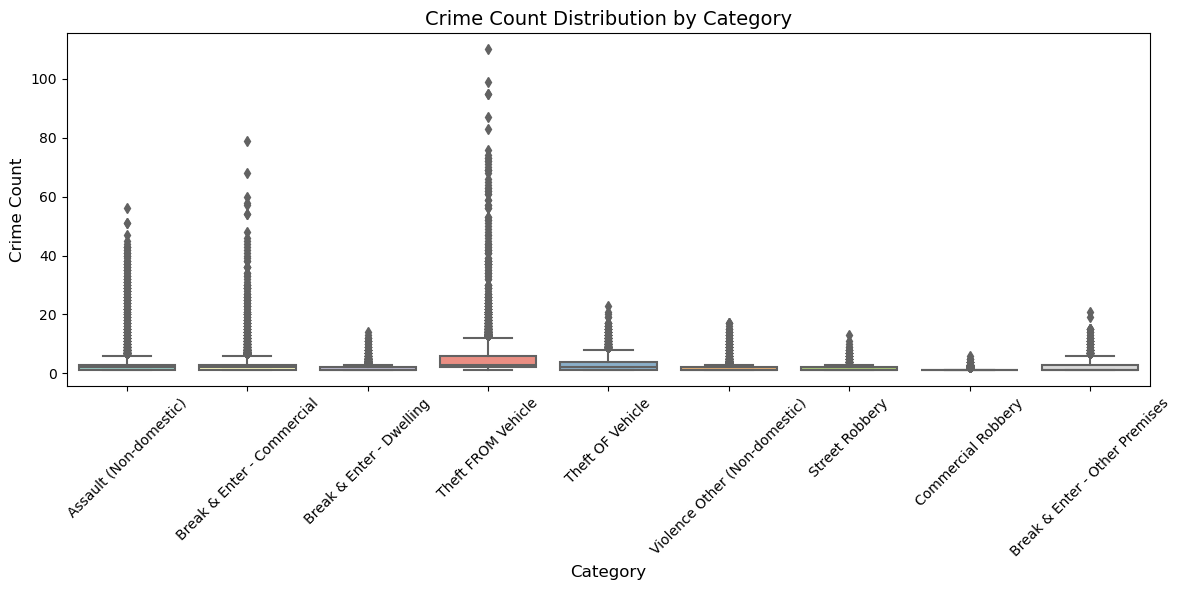

In [147]:
# Plotting a boxplot for crime count by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crime Category', y='Crime Count', data=df, palette='Set3')
plt.title('Crime Count Distribution by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

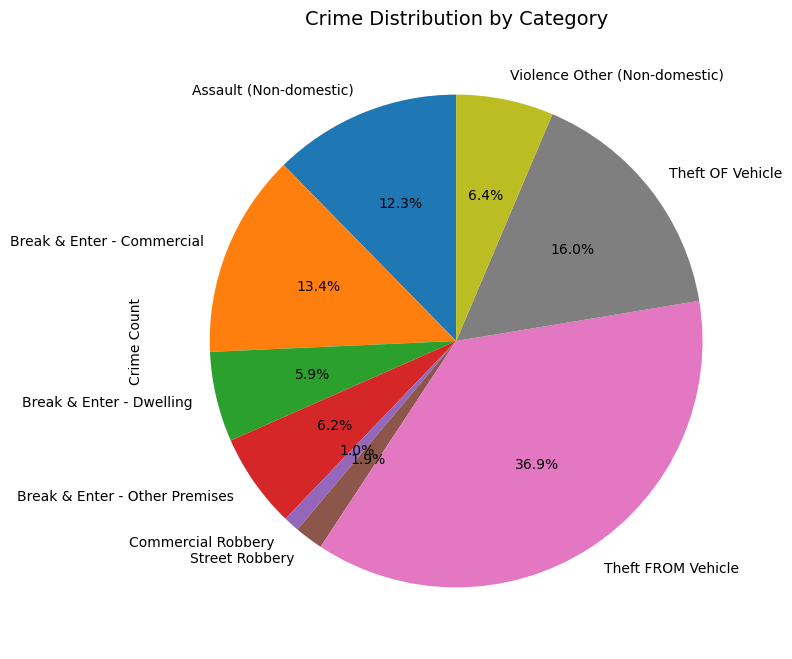

In [148]:
# Group by category and sum the crime count
crime_by_category=df.groupby('Crime Category')['Crime Count'].sum()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
crime_by_category.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Crime Distribution by Category', fontsize=14)
plt.show()


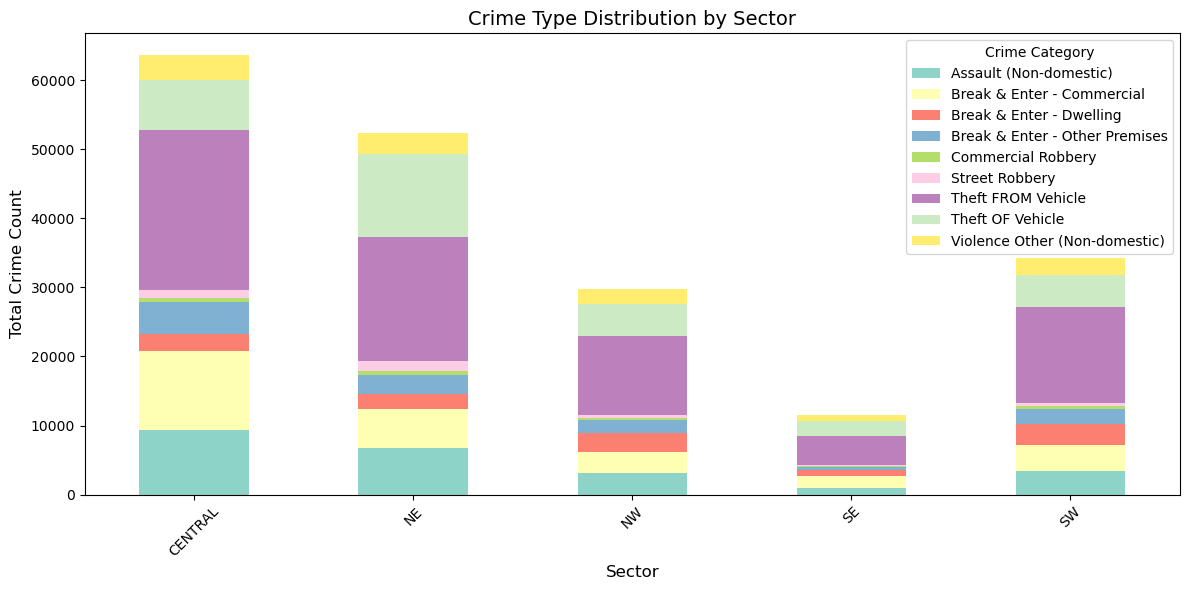

In [149]:
# Pivot the data to create a table of crime types by sector
crime_by_sector = df.pivot_table(index='Sector', columns='Crime Category', values='Crime Count', aggfunc='sum')

# Plotting
crime_by_sector.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Crime Type Distribution by Sector', fontsize=14)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Data Preprocessing 2

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Columns for label encoding
cols = ['Sector', 'Crime Category']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Sector [2 1 4 3 0]
Crime Category [0 1 2 6 7 8 5 4 3]


In [160]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Crime Count','Resident Count']] = MinMaxScaler().fit_transform(df[['Crime Count','Resident Count']])

In [161]:
df.head()

,Sector,Community Name,Crime Category,Crime Count,Resident Count,Year,Month,Crime Count Log
ID,,,,,,,,
2022-NOV-01B-Assault (Non-domestic),2,01B,0,0.000000,0.0,2022,NOV,0.000000
2019-JUN-01B-Break & Enter - Commercial,2,01B,1,0.000000,0.0,2019,JUN,0.000000
2019-AUG-01B-Break & Enter - Commercial,2,01B,1,0.000000,0.0,2019,AUG,0.000000
2020-MAR-01B-Break & Enter - Commercial,2,01B,1,0.009174,0.0,2020,MAR,0.009132
2020-JUL-01B-Break & Enter - Commercial,2,01B,1,0.009174,0.0,2020,JUL,0.009132
